In [1]:
from utils import *
from modeling import *
from plotting import *

%load_ext autoreload
%autoreload 2

### Build PSF models from fitted parameters

In [2]:
# Define PSF image size and pixel_scale
image_size = 1001        # in pixel
pixel_scale = 2.5        # in arcsec/pixel

In [3]:
# PSF Parameters
frac = 0.3                          # fraction of power law component (from fitting stacked PSF)
beta = 10                           # moffat beta, in arcsec
fwhm = 2.28 * pixel_scale           # moffat fwhm, in arcsec

n0 = 3.24                   # first power-law index
theta_0 = 5.                # flattening radius (arbitrary), in arcsec

n_s = np.array([n0, 2.53, 1.22, 4])                          # power-law index
theta_s = np.array([theta_0, 10**1.85, 10**2.18, 1200])      # transition radius in arcsec

# Construct model PSF
params = {"fwhm":fwhm, "beta":beta, "frac":frac, "n_s":n_s, 'theta_s':theta_s}
psf = PSF_Model(params, aureole_model='multi-power')

In [4]:
# Build grid of image for drawing
psf.make_grid(image_size, pixel_scale)

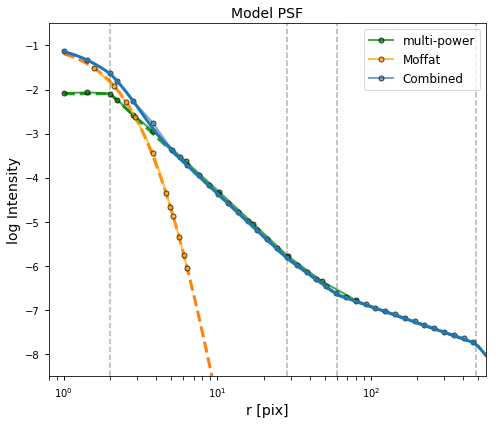

In [6]:
# Generate core and aureole PSF
psf_c = psf.generate_core()

# Generate core aureole
psf_e, psf_size = psf.generate_aureole(psf_range=1200)

# Plot Galsim 2D model (averaged in 1D) and 1D model 
psf.plot_PSF_model_galsim()

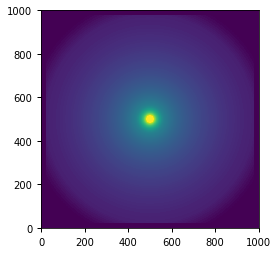

In [7]:
# Draw PSF in 2D
image_psf = psf.image_psf.array.copy()
plt.imshow(image_psf, norm=norm1, vmin=1e-8, vmax=1e-5, cmap='viridis')

# Save 2D PSF as fits
psf.write_psf_image(image_psf, filename='Model_PSF-NGC5907-G.fits')

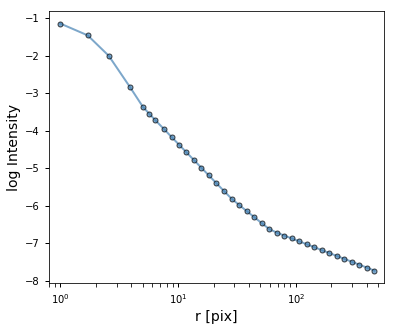

In [8]:
# Replot averaged 1D profile
r_rbin, z_rbin, logzerr_rbin = cal_profile_1d(image_psf, pixel_scale=pixel_scale, 
                                              core_undersample=False, mock=True,
                                              xunit="pix", figsize=(6,5))

### Modifying PSF

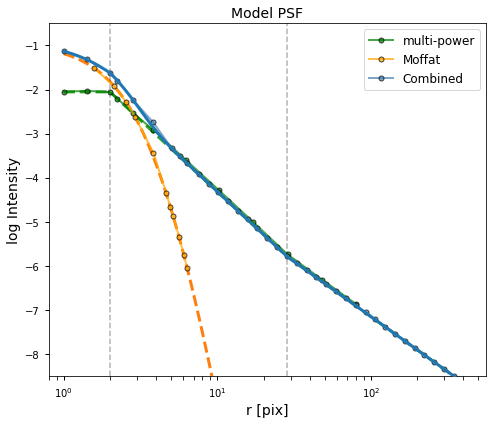

In [10]:
# Update PSF to a double power-law
psf.update({'n_s':[n0, 2.5], 'theta_s':[theta_0, 10**1.85]})

# Re-generate core aureole
psf_e, psf_size = psf.generate_aureole(psf_range=1200)

# Plot Galsim 2D model (averaged in 1D) and 1D model 
psf.plot_PSF_model_galsim()

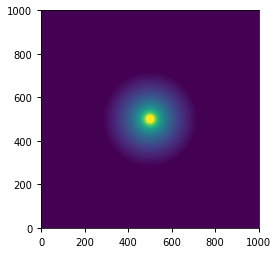

In [11]:
image_psf2 = psf.image_psf.array.copy()
plt.imshow(image_psf2, norm=norm1, vmin=1e-8, vmax=1e-5, cmap='viridis')

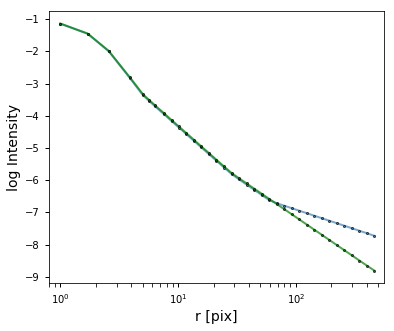

In [12]:
r_rbin, z_rbin, logzerr_rbin = cal_profile_1d(image_psf, pixel_scale=pixel_scale, 
                                              core_undersample=False, mock=True,
                                              xunit="pix", markersize=2, figsize=(6,5))

r_rbin, z_rbin, logzerr_rbin = cal_profile_1d(image_psf2, pixel_scale=pixel_scale, 
                                              core_undersample=False, mock=True,
                                              xunit="pix", markersize=2, color='g')